<a href="https://colab.research.google.com/github/dpcks/playdata/blob/main/DeepLearning/05_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/딥러닝/data/"
SEED =42

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(f"{DATA_PATH}imdb.csv")
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
df["sentiment"].mean() # sentiment에 대한 1에 대한 비율

0.516042780748663

# 자연어 처리 (Natural Language Processing)
- 자연어 이해
    - 읽기 ex) 뉴스를 읽어 카테고리 분류
- 자연어 생성
    - Text to Text
    - 챗봇


# 단어문서행렬(Term Document Matrix) TDM
- 문서별로 단어의 빈도를 정리한 표


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # 각 문장의 단어의 빈도수를 세줌
cnt_vec = CountVectorizer(max_features=100, stop_words="english") # 상위 가장 많은 빈도순 설정 100개까지

tdm = cnt_vec.fit_transform(df["review"])
tdm # 100개까지 해줫으니까 열이 100

<748x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
tdm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cnt_vec.get_feature_names_out() # 컬럼명(알파벳순)

array(['10', 'acting', 'actor', 'actors', 'actually', 'art', 'awful',
       'bad', 'beautiful', 'best', 'better', 'big', 'black', 'boring',
       'camera', 'cast', 'character', 'characters', 'cinematography',
       'definitely', 'dialogue', 'did', 'didn', 'director', 'doesn',
       'don', 'drama', 'effects', 'end', 'ending', 'excellent', 'feeling',
       'film', 'films', 'funny', 'game', 'going', 'good', 'great',
       'highly', 'interesting', 'job', 'just', 'know', 'life', 'like',
       'liked', 'line', 'little', 'look', 'love', 'loved', 'make', 'man',
       'movie', 'movies', 'music', 'people', 'performance', 'piece',
       'played', 'plot', 'predictable', 'pretty', 'quite', 'real',
       'really', 'recommend', 'right', 'saw', 'say', 'scene', 'scenes',
       'screen', 'script', 'seen', 'short', 'simply', 'story', 'stupid',
       'terrible', 'thing', 'things', 'think', 'thought', 'time',
       'totally', 'truly', 've', 'waste', 'watch', 'watching', 'way',
       'wonderfu

In [ ]:
tdm_df = pd.DataFrame(tdm.toarray(),columns=cnt_vec.get_feature_names_out()) # 데이터프레임 만들어주기
tdm_df

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tdm_df.sum().to_dict() # 시각화 해보고자 딕셔너리로 변경

{'10': 29,
 'acting': 43,
 'actor': 10,
 'actors': 19,
 'actually': 10,
 'art': 13,
 'awful': 14,
 'bad': 71,
 'beautiful': 11,
 'best': 25,
 'better': 18,
 'big': 10,
 'black': 10,
 'boring': 10,
 'camera': 10,
 'cast': 18,
 'character': 24,
 'characters': 35,
 'cinematography': 10,
 'definitely': 9,
 'dialogue': 13,
 'did': 11,
 'didn': 22,
 'director': 12,
 'doesn': 12,
 'don': 26,
 'drama': 10,
 'effects': 9,
 'end': 11,
 'ending': 11,
 'excellent': 16,
 'feeling': 10,
 'film': 163,
 'films': 24,
 'funny': 19,
 'game': 9,
 'going': 10,
 'good': 58,
 'great': 41,
 'highly': 10,
 'interesting': 12,
 'job': 9,
 'just': 63,
 'know': 14,
 'life': 12,
 'like': 48,
 'liked': 10,
 'line': 12,
 'little': 17,
 'look': 19,
 'love': 22,
 'loved': 10,
 'make': 22,
 'man': 13,
 'movie': 182,
 'movies': 29,
 'music': 14,
 'people': 14,
 'performance': 12,
 'piece': 10,
 'played': 10,
 'plot': 28,
 'predictable': 10,
 'pretty': 13,
 'quite': 10,
 'real': 21,
 'really': 41,
 'recommend': 13,
 'righ

# 단어구름 만들어 시각화해보기

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white',width=500,height=500)

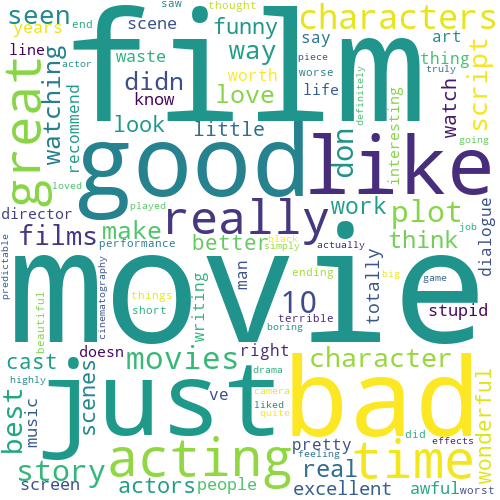

In [ ]:
cloud = wc.generate_from_frequencies(tdm_df.sum().to_dict())
cloud.to_image()

# TF-IDF
- 단어 빈도(TF) 와 역문서빈도(IDF) 를 곱한값
- 단어 빈도에 가중치를 주는 방법
- 문서빈도(DF) : 각 단어가 등장한 문서의 수
- 역문서빈도(IDF) : 총문서를 DF로 나눈 값 
- idf가 높을수록 좋은 단어이다  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=100, stop_words="english")
tfidf= tfidf_vec.fit_transform(df["review"])
tfidf

<748x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tfidf.toarray(),columns = tfidf_vec.get_feature_names_out())

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.402595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.618573,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.785154,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
744,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.652005,0.0,0.0,0.0,0.0,0.0
745,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
746,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# 토큰화(tokenization)
- 자연어 처리를 위해 문장을 처리하기 위한 단위인 토큰으로 분리하는 것 

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")
# get_tokenizer(lambda x : x.split()) # 콜백함수로 넣는 또다른 방법

In [ ]:
tokenizer("i love you")

['i', 'love', 'you']

- 어휘집 만들기

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
def yield_tokens(data,tokenizer):
    for text in data:
        yield tokenizer(text)

- padding
    - 문자열의 길이를 맞추기 위해 채워주는것 (대부분 0)
- OOV(Out-Of-Vocabulary)
    - 모르는 새로운 단어가 나올떄 특정 숫자로 채우겠다 (대부분 1)


In [ ]:
gen = yield_tokens(df["review"],tokenizer)
vocab = build_vocab_from_iterator(gen,specials=["<pad>","<unk>"]) # 문자의길이를 맞추기위해 <pad>를 사용함으로써 0으로 지정 <pad>사전에 없는 단어를 1로 지정
vocab.set_default_index(vocab["<unk>"]) # 새로운 단어가 생기면 1로 바꾸겠다

In [ ]:
len(vocab) # 내가 만든 단어사전에 단어가 몇개 있는지

3146

In [ ]:
vocab(["a","very","karns"]) # karns는 단어장에 정의되있지 않기 때문에 1로 출력

[6, 34, 1]

In [ ]:
vocab.lookup_tokens([6,34,1,0]) # 디코딩 방법

['a', 'very', '<unk>', '<pad>']

- 학습 및 정답 데이터 만들기 

In [ ]:
train = [vocab(tokenizer(text)) for text in df["review"].tolist()] # 토큰화와 정수인코딩가지 마친 데이터
target = df.sentiment.to_numpy()
len(train), target.shape

(748, (748,))

In [ ]:
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import random # 시드 고정을 위해
import os # 시드 고정을 위해

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
    np.random.seed(seed)
    torch.manual_seed(seed) # cpu 연산 무작위 고정
    torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
    torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self,x,y=None):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x) # 리스트로 들어오때문에 len으로 반환
    def __getitem__(self,idx):
        item={}
        item["x"] = self.x[idx]
        if self.y is not None:
            item["y"] = self.y[idx]
        return item

In [ ]:
dt = ReviewDataset(train,target)
dt[0]

{'x': [6,
  34,
  4,
  34,
  4,
  34,
  2741,
  4,
  1263,
  16,
  44,
  6,
  1688,
  4,
  1709,
  524,
  155,
  2],
 'y': 0}

- collate_fn

In [ ]:
def collate_fn(samples):
    x = [torch.LongTensor(sample["x"]) for sample in samples] # int 64형태로 변경 LongTensor
    y = [sample["y"] for sample in samples]
    y = torch.Tensor(y).view(-1,1)
    x = torch.nn.utils.rnn.pad_sequence(x,batch_first=True) # 문자 길이에 맞춰 채워준다. 입력데이터 batch가 먼저기 때문에 True
    return {"x":x, "y":y}


In [ ]:
dl = torch.utils.data.DataLoader(dt, shuffle=False , batch_size = 8, collate_fn = collate_fn)

In [ ]:
batch = next(iter(dl))
batch

{'x': tensor([[   6,   34,    4,   34,    4,   34, 2741,    4, 1263,   16,   44,    6,
          1688,    4, 1709,  524,  155,    2,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [  32,  696,   62,   15,   71,  462,   70,    3,  896,   66,   58,    3,
           345,    4, 2338,  312,    7, 1187, 1174,   52,    2,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [1319, 1306,   26,  198,  216,  264,    5,  352,  244,  753,    4,    3,
            16,  304,   70,  769,   59,   71,  387,   70,   24,    3,   54,   15,
           329,    5,    3,   80,    5,  280,  218, 2357,    2],
         [  34,  125,  144,   58,  241,   13,  690,    7,    2,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0],
         [   3,   85,  147,   14,    3,   16,   15,   77, 1934,    8,  513,   1

# 단어 임베딩 (embedding)
- 단어를 실수 형태의 벡터로 표현하는것
- 신경망에서 임베딩 레이어를 추가하여 단어에 임베딩을 얻을수 있음.

- num_embeddings
    - 임베딩을 할 단어들의 개수
- embedding_dim
    - 단어마다 임베딩할 벡터의 차원




In [ ]:
len(vocab)

3146

In [ ]:
batch["x"].shape

torch.Size([8, 33])

In [ ]:
emb_layer = torch.nn.Embedding(len(vocab),4) # 4개의 차원
x = emb_layer(batch["x"])
x.shape # 8개행 입력길이 33 4개로 벡터화

torch.Size([8, 33, 4])

In [ ]:
x

tensor([[[ 0.0766,  0.2152, -0.4008,  0.8827],
         [ 0.6231, -0.7009, -1.4008, -1.7198],
         [ 1.1863,  0.0233, -0.5774,  2.7251],
         ...,
         [ 1.2833,  0.2229, -0.6474, -0.3285],
         [ 1.2833,  0.2229, -0.6474, -0.3285],
         [ 1.2833,  0.2229, -0.6474, -0.3285]],

        [[ 0.3649, -0.8922, -0.6169, -1.2437],
         [ 0.3201,  1.4867, -0.5243, -0.5753],
         [-0.3363,  0.9650, -2.6857, -1.2600],
         ...,
         [ 1.2833,  0.2229, -0.6474, -0.3285],
         [ 1.2833,  0.2229, -0.6474, -0.3285],
         [ 1.2833,  0.2229, -0.6474, -0.3285]],

        [[-0.9602, -1.8088,  1.0082,  0.3409],
         [ 0.3308, -0.7767, -0.3932, -1.2909],
         [-2.0816,  0.9417, -0.4835, -0.2564],
         ...,
         [ 0.7707, -3.1561, -0.2798,  0.1369],
         [ 0.4193, -0.2384,  0.2517,  0.8529],
         [-0.1960,  0.7695,  0.1302,  0.6749]],

        ...,

        [[ 0.2881,  1.0138, -0.7301, -0.9562],
         [ 0.8240, -0.2852, -0.9649,  0.9801]

In [ ]:
emb_layer.weight # 1번쨰 행이 0번째 단어의 가중치

Parameter containing:
tensor([[ 1.2833,  0.2229, -0.6474, -0.3285],
        [-0.0170, -1.2954, -1.8925, -0.6245],
        [-0.1960,  0.7695,  0.1302,  0.6749],
        ...,
        [-0.5238,  0.4188, -1.1470, -2.0733],
        [-1.1832,  1.1193, -0.5827, -0.0641],
        [-1.6993,  0.3360, -0.8105, -0.5283]], requires_grad=True)

In [ ]:
# 임베딩 레이어를 통과시킨다.
# rnn 레이어를 통과시킨다
# torch.info는 안됨

In [ ]:
type(train)

list

In [ ]:
train = np.array(train,dtype="object")# 학습데이터와 검증데이터를 나눌려면 넘파이로 바꿔야한다.

In [ ]:
train.shape

(748,)

In [ ]:
target.shape

(748,)

In [ ]:
class RNNModel(torch.nn.Module):
    def __init__(self,vocab_size,embedding_dim):
        super().__init__()
        self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)
        self.lstm_layer = torch.nn.LSTM(embedding_dim,embedding_dim//2,batch_first=True)
        self.output_layer = torch.nn.Linear(embedding_dim//2,1)
    def forward(self,x):
        x = self.emb_layer(x)
        _, (x,y) = self.lstm_layer(x) # hn은 마지막셀에 히든출력이 나온다. output은 각셀의 히든출력, 입력길이가 33이면 33개출력 cn은 셀스테이트 출력
        x = x.squeeze() 
        x = self.output_layer(x)
        return x

In [ ]:
# class RNNModel(torch.nn.Module):
#     def __init__(self,vocab_size,embedding_dim):
#         super().__init__()
#         self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)
#         self.gru_layer = torch.nn.GRU(embedding_dim,embedding_dim//2,batch_first=True) #torch.Size([1, 8, 16]) torch.Size([8, 16])
#         self.output_layer = torch.nn.Linear(embedding_dim//2,1)
#     def forward(self,x):
#         x = self.emb_layer(x)
#         _,x = self.gru_layer(x) # hn은 마지막셀에 히든출력이 나온다. output은 각셀의 히든출력, 입력길이가 33이면 33개출력 cn은 셀스테이트 출력
#         x = x.squeeze() 
#         x = self.output_layer(x)
#         return x

In [ ]:
# class RNNModel(torch.nn.Module):
#     def __init__(self, vocab_size,embedding_dim):
#         super().__init__()
#         self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)
#         self.lstm_layer = torch.nn.LSTM(embedding_dim,embedding_dim//2,batch_first=True)
#         self.gru_layer = torch.nn.GRU(embedding_dim//2,embedding_dim//4,batch_first=True)
#         self.seq = torch.nn.Sequential(
#             torch.nn.Linear(embedding_dim,embedding_dim//4),
#             torch.nn.ReLU(),
#             torch.nn.Linear(embedding_dim//4,embedding_dim//4),
#             torch.nn.ReLU(),
#             torch.nn.Linear(embedding_dim,embedding_dim//2,1)
#         )

#         def forward(self,x):
#             x = self.emb_layer(x)
#             _,(x,_) = self.lstm_layer(x)
#             x1 = x.squeeze()

#             _,x = self.gru_layer(x)
#             x2 = x.squeeze()

#             x = torch.cat((x,x1,x2),dim=1)

#             x= self.seq(x)

#             return x


In [ ]:
# class RNNModel(torch.nn.Module):
#     def __init__(self,vocab_size,embedding_dim):
#         super().__init__()
#         self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)
#         self.lstm_layer = torch.nn.LSTM(embedding_dim,embedding_dim//2,batch_first=True) #torch.Size([1, 8, 16]) torch.Size([8, 16])
#         self.seq = torch.nn.Sequential(
#             torch.nn.Linear(embedding_dim,embedding_dim//4),
#             torch.nn.ReLU(),
#             torch.nn.Linear(embedding_dim//4,embedding_dim//4),
#             torch.nn.ReLU(),
#             torch.nn.Linear(embedding_dim,embedding_dim//2,1)
#         )
        
#         self.gru_layer = torch.nn.GRU(embedding_dim,embedding_dim//2,batch_first=True) #torch.Size([1, 8, 16]) torch.Size([8, 16])
#         self.seq = torch.nn.Sequential(
#             torch.nn.Linear(embedding_dim,embedding_dim//4),
#             torch.nn.ReLU(),
#             torch.nn.Linear(embedding_dim,embedding_dim//4),
#             torch.nn.ReLU(),
#             torch.nn.Linear(embedding_dim,embedding_dim//2,1)
#         )
    
#     def forward(self,x):
#         y = self.emb_layer(x)
#         _,(a,b) = self.lstm_layer(y) # hn은 마지막셀에 히든출력이 나온다. output은 각셀의 히든출력, 입력길이가 33이면 33개출력 cn은 셀스테이트 출력
        
#         a = a.squeeze() 
#         y = self.seq(a)

#         # ----------------------

#         x = self.emb_layer(x)
#         _,x = self.gru_layer(x) # hn은 마지막셀에 히든출력이 나온다. output은 각셀의 히든출력, 입력길이가 33이면 33개출력 cn은 셀스테이트 출력
        
#         x = x.squeeze() 
#         x = self.seq(x)

#         # torch.mean((x,y),dim=1)

#         return x,y

In [ ]:
model = RNNModel(len(vocab),32)
model(batch["x"])

tensor([[ 0.1680],
        [ 0.1678],
        [-0.1398],
        [ 0.1680],
        [ 0.1678],
        [ 0.1219],
        [ 0.1680],
        [ 0.1680]], grad_fn=<AddmmBackward0>)

In [ ]:
# x.shape, y.shape
# lst = [x,y]
# np.mean(lst,axis=1)

RuntimeError: ignored

In [ ]:
batch["x"].shape

torch.Size([8, 33])

In [ ]:
def train_loop(dataloader, model, loss_fn,optimizer,device):
    epoch_loss = 0
    model.train()
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        # print(pred.ndim, pred)
        loss = loss_fn(pred,batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_loss /= len(dataloader)
    
    return epoch_loss
# print(train_loop(train,model,torch.nn.BCEWithLogitsLoss(),torch.optim.Adam(model.parameters()),device))

In [ ]:
@torch.no_grad()
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0
    model.eval() # 모델 객체가 들어오는 train메소드선언

    pred_list = []
    for batch in dataloader:
        pred = model(batch["x"].to(device)) #gpu로 옮겨줌

        if batch.get("y") is not None:
            loss = loss_fn(pred,batch["y"].to(device))# 정답값과 예측값의 오차
            epoch_loss += loss.item()
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list)
    return epoch_loss,pred

In [ ]:
n_splits = 5
num_features = len(vocab)
embedding_dim = 32
batch_size = 32
epoch = 100
loss_fn = torch.nn.BCEWithLogitsLoss() #이진분류

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=n_splits,shuffle=True,random_state=SEED)

In [ ]:
is_holdout = False

best_score_list = []
reset_seeds(SEED)
for i,(tri,vai) in enumerate(cv.split(train)):
    model = RNNModel(num_features,embedding_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    # datatset
    train_dt = ReviewDataset(train[tri],target[tri]) # x_train,y_train 이거랑 똑같음
    valid_dt = ReviewDataset(train[vai],target[vai])

    # dataloader
    train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle=True,collate_fn=collate_fn)
    valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False,collate_fn=collate_fn) # 검증은 학습이 아니니까 섞을 필요가 없다.

    best_score = 0
    patience = 0 # 5가되면 멈춰
    for e in tqdm(range(epoch)):
        train_loss = train_loop(train_dl,model, loss_fn, optimizer, device)
        valid_loss,pred = test_loop(valid_dl,model,loss_fn,device)
        pred = (pred > 0.2).astype(int)
        score = accuracy_score(target[vai],pred)
        patience += 1
        if best_score < score:
            patience = 0
            best_score = score
            torch.save(model.state_dict(),f"model_{i}.pth")

        if patience == 5:
            break
    print(f"BEST ACCURACY:{best_score}")
    best_score_list.append(best_score)
  
        
    if is_holdout:
        break 

  0%|          | 0/100 [00:00<?, ?it/s]

BEST ACCURACY:0.5066666666666667


  0%|          | 0/100 [00:00<?, ?it/s]

BEST ACCURACY:0.5066666666666667


  0%|          | 0/100 [00:00<?, ?it/s]

BEST ACCURACY:0.48


  0%|          | 0/100 [00:00<?, ?it/s]

BEST ACCURACY:0.4966442953020134


  0%|          | 0/100 [00:00<?, ?it/s]

BEST ACCURACY:0.42953020134228187


In [ ]:
type(pred)


numpy.ndarray

In [ ]:
is_holdout = False
reset_seeds(SEED)
best_score_list = []
for i,(tri,vai) in enumerate(cv.split(train)):
  model = Conv1dModel(num_features,embedding_dim).to(device)
  optimizer = torch.optim.Adam(model.parameters())
  # dataset
  train_dt = ReviewDataset(train[tri],target[tri])
  valid_dt = ReviewDataset(train[vai],target[vai])
  # dataloaer
  train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size, shuffle=True)
  valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size, shuffle=False)
  best_score = 0
  patience = 0
  for epoch in tqdm(range(epochs)):
    train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
    valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
    pred = pred.flatten()
    pred = np.where(pred>0.5,1,0)
    score = accuracy_score(target[vai],pred)
    patience += 1
    if best_score < score:
      patience = 0
      best_score = score
      torch.save(model.state_dict(), f"model_{i}.pth")
    if patience == 10:
      break
  print(f"Fold ({i}), BEST accuracy: {best_score}")
  best_score_list.append(best_score)
  if is_holdout:
    break